start


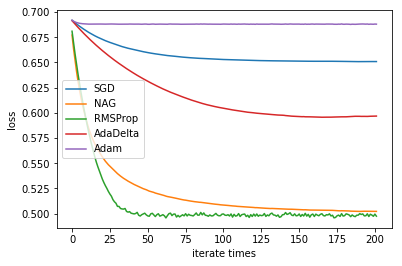

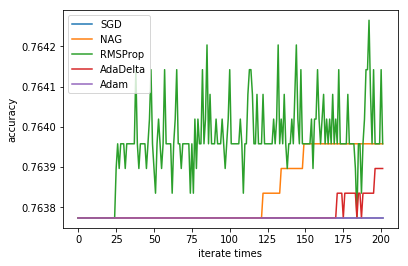

In [13]:
import sklearn
import numpy as np

from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
mem = Memory("./mycache")

@mem.cache
def get_data(filepath):
    data = load_svmlight_file(filepath)
    return data[0], data[1]

X, Y = get_data('C:/Users/WestbrookV/Desktop/a9a')

X_Test,y_Test = get_data('C:/Users/WestbrookV/Desktop/a9a.t')

from sklearn.model_selection import train_test_split

y_Test = np.mat(y_Test)
y_Test = y_Test.T
Y= np.mat(Y)
Y = Y.T

m = X_Test.shape[0]
z = np.zeros(m)
X_Test =X_Test.todense()
X_Test = np.column_stack((X_Test,z))
m1 = X_Test.shape[0]
o = np.ones(m1)
X_Test = np.column_stack((X_Test,o))

o1 = np.ones(X.shape[0])
X = X.todense()
X = np.column_stack((X,o1))


w = np.zeros(124);
w = np.mat(w)
w = w.T

w_NAG = w
w_RMSProp = w 
w_AdaDelta = w
w_Adam = w

V = w # for NAG
G_R = w # for RMSProp
Delta = w # for AdaDelta
G_D = w
c = 0.005 # for Adam
G_M = w
m = w

iterator = 0   # 迭代计数器
times = []       # 画图横坐标

# loss值
lossSGD =0      
lossNAG =0      
lossRMSProp =0
lossAdaDelta =0
lossAdam =0 

# accuracy值
accuracySGD =0      
accuracyNAG =0      
accuracyRMSProp =0
accuracyAdaDelta =0
accuracyAdam =0 

#loss数组 纵坐标
loss_SGD =[]      
loss_NAG =[]      
loss_RMSProp =[]
loss_AdaDelta =[]
loss_Adam =[]

#accuracy数组
accuracy_SGD =[]      
accuracy_NAG =[]      
accuracy_RMSProp =[]
accuracy_AdaDelta =[]
accuracy_Adam =[]


print("start")
while True:
    #随机抽样
    r = np.random.choice(1000)
    X_train,y_train = cut_data(X,Y,r)
    y_train = np.mat(y_train)
    y_train = y_train.T
    
    #更新w
    w = gradient(X_train,y_train,w,0.05)     # 0.00005是学习速率
    w_NAG = gradient_NAG(X_train ,y_train ,w_NAG-0.9*V ,0.03, V)
    w_RMSProp = gradient_RMSProp(X_train,y_train,w_RMSProp,0.001,G_R)
    w_AdaDelta = gradient_AdaDelta(X_train,y_train,w_AdaDelta,G_D,Delta)
    w_Adam = gradient_Adam(X_train,y_train,w_Adam,c,G_M,m,iterator+1) 
    
    #计算loss
    lossSGD =  cal_loss(X_Test,y_Test,w,0.0002) 
    lossNAG = cal_loss(X_Test,y_Test,w_NAG,0.03)       
    lossRMSProp = cal_loss(X_Test,y_Test,w_RMSProp,0.001) 
    lossAdaDelta = cal_loss(X_Test,y_Test,w_AdaDelta,1) 
    lossAdam = cal_loss(X_Test,y_Test,w_Adam,c) 
    
    #计算accuracy
    accuracySGD = cal_right_rate(X_Test,y_Test,w)       
    accuracyNAG = cal_right_rate(X_Test,y_Test,w_NAG)       
    accuracyRMSProp = cal_right_rate(X_Test,y_Test,w_RMSProp) 
    accuracyAdaDelta = cal_right_rate(X_Test,y_Test,w_AdaDelta) 
    accuracyAdam = cal_right_rate(X_Test,y_Test,w_Adam) 
    
    #更新图
    times.append(iterator) 
    loss_SGD.append(lossSGD[0,0])      
    loss_NAG.append(lossNAG[0,0])      
    loss_RMSProp.append(lossRMSProp[0,0])
    loss_AdaDelta.append(lossAdaDelta[0,0])
    loss_Adam.append(lossAdam[0,0])
    
    accuracy_SGD.append(accuracySGD)      
    accuracy_NAG.append(accuracyNAG)      
    accuracy_RMSProp.append(accuracyRMSProp)
    accuracy_AdaDelta.append(accuracyAdaDelta)
    accuracy_Adam.append(accuracyAdam)
    
    if (iterator > 200): #如果误差小于5或者迭代次数大于10000则停止  
        break; 
    iterator = iterator + 1;  

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#line_loss_train, = plt.plot(times , loss_train)
#line_loss_validate, = plt.plot(times , loss_validate)
#plt.xlabel('iterate times')
#plt.ylabel('loss')
#plt.legend([line_loss_train,line_loss_validate],['train','validate'])
#plt.show()
line_loss_SGD, = plt.plot(times , loss_SGD)
line_loss_NAG, = plt.plot(times , loss_NAG)
line_loss_RMSProp, = plt.plot(times , loss_RMSProp)
line_loss_AdaDelta, = plt.plot(times , loss_AdaDelta)
line_loss_Adam, = plt.plot(times , loss_Adam)

plt.xlabel('iterate times')
plt.ylabel('loss')

plt.legend([line_loss_SGD,line_loss_NAG,line_loss_RMSProp,line_loss_AdaDelta,line_loss_Adam],['SGD','NAG','RMSProp','AdaDelta','Adam'])
#line_right_rate_train, = plt.plot(times , right_rate_train)
#line_right_rate_validate, = plt.plot(times , right_rate_validate)
#plt.xlabel('iterate times')
#plt.ylabel('right_rate')
#plt.plot(times , right_rate)
#plt.legend([line_right_rate_train,line_right_rate_validate],['train','validate'])
plt.show()

line_accuracy_SGD, = plt.plot(times , accuracy_SGD)
line_accuracy_NAG, = plt.plot(times , accuracy_NAG)
line_accuracy_RMSProp, = plt.plot(times ,accuracy_RMSProp)
line_accuracy_AdaDelta, = plt.plot(times , accuracy_AdaDelta)
line_accuracy_Adam, = plt.plot(times , accuracy_Adam)

plt.xlabel('iterate times')
plt.ylabel('accuracy')

plt.legend([line_accuracy_SGD,line_accuracy_NAG,line_accuracy_RMSProp,line_accuracy_AdaDelta,line_accuracy_Adam],['SGD','NAG','RMSProp','AdaDelta','Adam'])
plt.show()

w.shape: (124, 1)
X_test.shape: (16281, 124)
y_test.shape: (16281, 1)
X.shape: (32561, 124)
Y.shape: (32561, 1)
start
finish


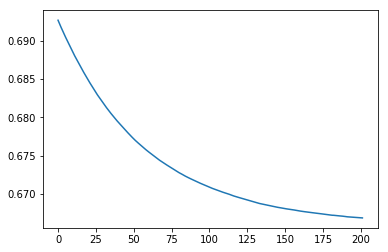

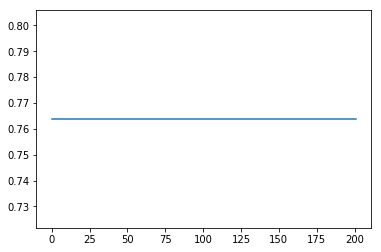

'\ntimes_test =[]\niterator = 0\nprint("start")\nwhile True:\n    w = gradient(X_Test,y_Test,w,0.05)\n    loss = cal_loss(X_Test,y_Test,w,0.05)\n    \n    times_test.append(iterator)\n    \n    \n    if ( iterator>10): #如果误差小于5或者迭代次数大于10000则停止  \n        break;\n    iterator = iterator + 1;\nprint(right_rate_test[-1])\nplt.plot(times , right_rate_test)\nplt.show()'

In [73]:
# SGD
import sklearn
import math
import numpy as np

from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
mem = Memory("./mycache")

@mem.cache
def get_data(filepath):
    data = load_svmlight_file(filepath)
    return data[0], data[1]

X, Y = get_data('C:/Users/WestbrookV/Desktop/a9a')

X_Test,y_Test = get_data('C:/Users/WestbrookV/Desktop/a9a.t')

from sklearn.model_selection import train_test_split


w = np.zeros(124);
w = np.mat(w)
w = w.T



y_Test = np.mat(y_Test)
y_Test = y_Test.T
Y= np.mat(Y)
Y = Y.T

m = X_Test.shape[0]
z = np.zeros(m)
X_Test =X_Test.todense()
X_Test = np.column_stack((X_Test,z))
m1 = X_Test.shape[0]
o = np.ones(m1)
X_Test = np.column_stack((X_Test,o))

o1 = np.ones(X.shape[0])
X = X.todense()
X = np.column_stack((X,o1))

print("w.shape:",w.shape)
#print("X_train.shape:",X_train.shape)
#print("y_train.shape:",y_train.shape)
print("X_test.shape:",X_Test.shape)
print("y_test.shape:",y_Test.shape)
print("X.shape:",X.shape)
print("Y.shape:",Y.shape)
times = []
loss_SGD = []
loss_NAG = []
loss_RMSProp = []
loss_AdaDelta = []
loss_Adam =[]

right_rate = []
right_rate_test = []
loss = 0
iterator = 0

print("start")
while True:
    r = np.random.choice(1000)
    X_train,y_train = cut_data(X,Y,r)

    y_train = np.mat(y_train)
    y_train = y_train.T
    
    w = gradient(X_train,y_train,w,0.03)#w + 0.005*( y_train.T*X_train/(1+np.exp(y_train.T*X_train*w)));
    # 0.00005是学习速率增大后收敛0.03   

    #print (type(X_train*w - y_train))
    loss = cal_loss(X_Test,y_Test,w,0.5)
    #loss = loss * loss.T
        
    times.append(iterator)
    loss_SGD.append(loss[0,0])
    right_rate.append(cal_right_rate(X_Test,y_Test,w))
    #right_rate_test.append(cal_right_rate(X_Test,y_Test,w))
    
    if ( iterator>200): #如果误差小于5或者迭代次数大于10000则停止  
        break;
    iterator = iterator + 1;  
print("finish")

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.plot(times ,loss_SGD)
plt.show()

plt.plot(times , right_rate)
plt.show()

loss = 0
'''
times_test =[]
iterator = 0
print("start")
while True:
    w = gradient(X_Test,y_Test,w,0.05)
    loss = cal_loss(X_Test,y_Test,w,0.05)
    
    times_test.append(iterator)
    
    
    if ( iterator>10): #如果误差小于5或者迭代次数大于10000则停止  
        break;
    iterator = iterator + 1;
print(right_rate_test[-1])
plt.plot(times , right_rate_test)
plt.show()'''

start
finish


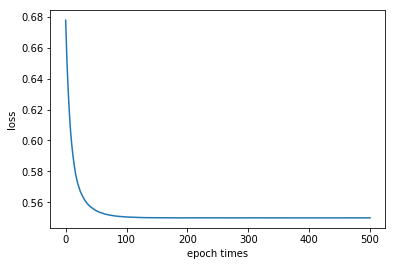

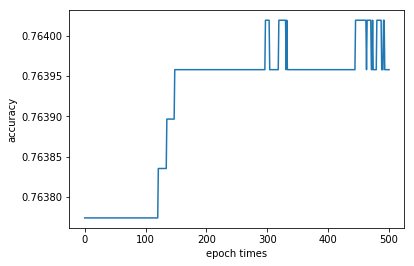

In [28]:
#NAG

V = np.zeros(124);
V = np.mat(V)
V = V.T


w_NAG= np.zeros(124);
w_NAG= np.mat(w_NAG)
w_NAG = w_NAG.T

loss = 0
iterator = 0
times4 = []
loss_NAG = []
accuracy_NAG = []
print("start")
while True:
    r = np.random.choice(1000)
    X_train,y_train = cut_data(X,Y,r)
    y_train = np.mat(y_train)
    y_train = y_train.T
    
    w_NAG = gradient_NAG(X_train,y_train,w_NAG-0.9*V,0.03,V)

    loss = cal_loss(X_Test,y_Test,w_NAG,0.5)
       
    times4.append(iterator)
    loss_NAG.append(loss[0,0])
    accuracy_NAG.append(cal_right_rate(X_Test,y_Test,w_NAG))
    
    if ( iterator>=500):  
        break;
    iterator = iterator + 1;  
print("finish")

#plt.plot(times4 , NAG_accuracy)#loss_NAG)

plt.plot(times4 , loss_NAG)
plt.xlabel('epoch times')
plt.ylabel('loss')
plt.show()

plt.plot(times4 , accuracy_NAG)
plt.xlabel('epoch times')
plt.ylabel('accuracy')
plt.show()

start
finish


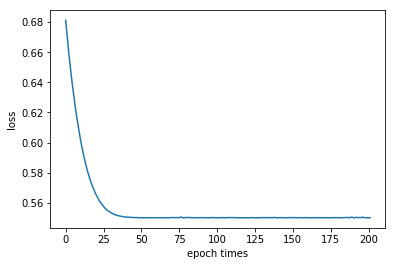

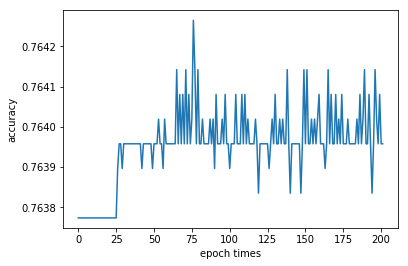

In [35]:
# RMSProp
G = np.zeros(124);
G = np.mat(G)
G = G.T

w_RMSProp = np.zeros(124);
w_RMSProp = np.mat(w_RMSProp)
w_RMSProp = w_RMSProp.T

loss = 0
times1 = []
loss_RMSProp = []
accuracy_RMSProp = []
iterator = 0

print("start")
while True:
    r = np.random.choice(1000)
    X_train,y_train = cut_data(X,Y,r)

    y_train = np.mat(y_train)
    y_train = y_train.T
    
    w_RMSProp = gradient_RMSProp(X_train,y_train,w_RMSProp,0.001,G) 

    loss = cal_loss(X_Test,y_Test,w_RMSProp,0.5)

    times1.append(iterator)
    loss_RMSProp.append(loss[0,0])
    accuracy_RMSProp.append(cal_right_rate(X_Test,y_Test,w_RMSProp))
        
    if ( iterator>200): #如果误差小于5或者迭代次数大于10000则停止  
        break;
    iterator = iterator + 1;  
print("finish")

plt.plot(times1 , loss_RMSProp)
plt.xlabel('epoch times')
plt.ylabel('loss')
plt.show()

plt.plot(times1 , accuracy_RMSProp)
plt.xlabel('epoch times')
plt.ylabel('accuracy')
plt.show()

start
finish


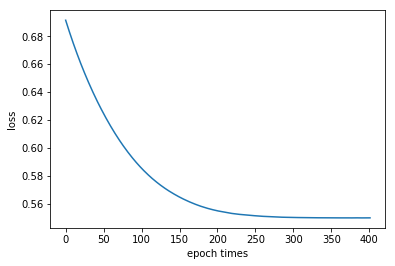

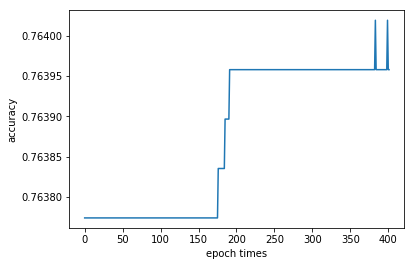

In [39]:
#AdaDelta
loss = 0
G_D = np.zeros(124);
G_D = np.mat(G_D)
G_D = G_D.T
Delta_D = np.zeros(124)
Delta_D = np.mat(Delta_D)
Delta_D = Delta_D.T

times2 = []
loss_AdaDelta = []
accuracy_AdaDelta = []
iterator = 0

w_AdaDelta = np.zeros(124);
w_AdaDelta = np.mat(w_AdaDelta)
w_AdaDelta = w_AdaDelta.T

print("start")
while True:
    r = np.random.choice(1000)
    X_train,y_train = cut_data(X,Y,r)
    y_train = np.mat(y_train)
    y_train = y_train.T
    
    w_AdaDelta = gradient_AdaDelta(X_train,y_train,w_AdaDelta,G_D,Delta_D)

    loss = cal_loss(X_Test,y_Test,w_AdaDelta,0.5)
       
    times2.append(iterator)
    loss_AdaDelta.append(loss[0,0])
    accuracy_AdaDelta.append(cal_right_rate(X_Test,y_Test,w_AdaDelta))
    
    if ( iterator>400):  
        break;
    iterator = iterator + 1;  
print("finish")

plt.plot(times2 , loss_AdaDelta)
plt.xlabel('epoch times')
plt.ylabel('loss')
plt.show()

plt.plot(times2 , accuracy_AdaDelta)
plt.xlabel('epoch times')
plt.ylabel('accuracy')
plt.show()

start
finish


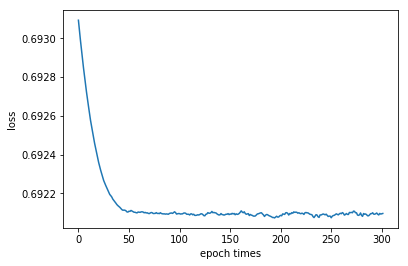

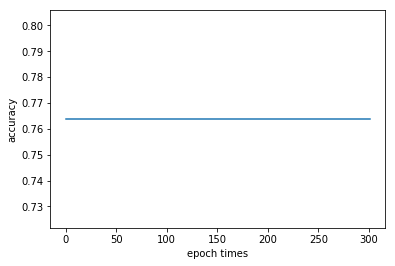

In [38]:
#Adam

G_M = np.zeros(124);
G_M = np.mat(G_M)
G_M = G_M.T
Delta_M = np.zeros(124)
Delta_M = np.mat(Delta_M)
Delta_M = Delta_M.T
m = np.zeros(124)
m = np.mat(m)
m = m.T

w_Adam= np.zeros(124);
w_Adam= np.mat(w_Adam)
w_Adam = w_Adam.T

loss = 0
iterator = 0
times3 = []
loss_Adam = []
accuracy_Adam =[]
c = 0.001

print("start")
while True:
    r = np.random.choice(1000)
    X_train,y_train = cut_data(X,Y,r)
    y_train = np.mat(y_train)
    y_train = y_train.T
    
    w_Adam = gradient_Adam(X_train,y_train,w_Adam,c,G_M,m,iterator+1)
    
    loss = cal_loss(X_Test,y_Test,w_Adam,0.5)
       
    times3.append(iterator)
    loss_Adam.append(loss[0,0])
    accuracy_Adam.append(cal_right_rate(X_Test,y_Test,w_Adam))
    
    if ( iterator>300):  
        break;
    iterator = iterator + 1;  
print("finish")

plt.plot(times3 , loss_Adam)
plt.xlabel('epoch times')
plt.ylabel('loss')
plt.show()

plt.plot(times3 , accuracy_Adam)
plt.xlabel('epoch times')
plt.ylabel('accuracy')
plt.show()

In [2]:
def gradient_Adam(x,y,w,c,Gt,mt,k):
    M = x.shape[0]
    g = np.zeros(124);
    g = np.mat(g)
    g = g.T
    _y = y.T
    phi = 0.999
    beta = 0.9
    for i in range(M):
        g += (c*_y[i]*x[i]/(1+np.exp(_y[i]*x[i]*w))).T
    g/=M
    g =0.5*w -g
    Gt = phi*Gt + (1-phi)* np.multiply(g , g)
    mt = beta*mt + (1-beta)*g
    alpha = c * np.sqrt(1 - phi**k)/np.sqrt(1-beta**k)
    w = w - alpha * mt /np.sqrt(Gt + 1e-8)
    c = c/np.sqrt(k)
    return w

In [3]:
def gradient_AdaDelta(x,y,w,Gt,Delt):
    M = x.shape[0]
    g = np.zeros(124);
    g = np.mat(g)
    g = g.T
    _y = y.T
    phi = 0.95

    for i in range(M):
        g += (_y[i]*x[i]/(1+np.exp(_y[i]*x[i]*w))).T
    g/=M
    g =0.5*w - g
    Gt = phi*Gt + (1-phi)* np.multiply(g , g)
    DeltaW = - (np.multiply((np.sqrt(Delt + 1e-8)/np.sqrt(Gt + 1e-8)),g))
    w = w + DeltaW
    Delt = phi*Delt + (1-phi)* np.multiply(DeltaW , DeltaW)
    return w

In [4]:
def gradient_RMSProp(x,y,w,c,G):
    Gt = G
    M = x.shape[0]
    g = np.zeros(124);
    g = np.mat(g)
    g = g.T
    _y = y.T
    phi = 0.9

    for i in range(M):
        g += (_y[i]*x[i]/(1+np.exp(_y[i]*x[i]*w))).T
    g/=M
    g =0.5*w - g
    Gt = phi*Gt + (1-phi)* np.multiply(g , g)
    w = w - np.multiply(c/np.sqrt(Gt + 1e-8),g)
    return w
    

In [5]:
def gradient_NAG(x,y,w,c,v):
    M = x.shape[0]
    g = np.zeros(124);
    g = np.mat(g)
    g = g.T
    t = g 
    _y = y.T
    phi = 0.9
    t = (_y * x )/(1 + np.exp(_y*x*w))
    g = np.mean(t)
    #for i in range(M):
     #   g += (_y[i]*x[i]/(1+np.exp(_y[i]*x[i]*w))).T#qudiao c
    #g/=M
    g=0.5*w - g#bianwei -
    v = phi*v + c*g
    g = w - v
    return g

In [6]:
def gradient(x,y,w,c):
    v_prev = w
    M = x.shape[0]
    g = np.zeros(124);
    g = np.mat(g)
    g = g.T
    _y = y.T
    for i in range(M):
        #print(x[i].shape)
        #print(w.shape)
        #print(_y[i].shape)
        g += (c*_y[i]*x[i]/(1+np.exp(_y[i]*x[i]*w))).T
        
    g/=M
    g*=c 
    #g-=0.9*v_prev
    g+=(1-c*0.5)*w
    return g
    #g = w - c * 

In [8]:
def cut_data(X,Y,r):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=r)
    return X_test,y_test

In [7]:
def cal_loss(x,y,w,C):
        
    l=0
    J = 0
    M = x.shape[0]
    #y = y.T
    for i in range(M):

        l+=np.log(1+np.exp(-y[i].T*x[i]*w))
        
    l/=M
    l+=C*(w.T*w)/2
    return l

In [32]:
def cal_right_rate(x,y,w):
    #y=y.T
    m = y.shape[0]
    right_num = 0 

    right = np.sign(x*w)  

    for i in range(m):
        if (right[i][0] == y[i][0]):
            right_num+=1

    return right_num/m

In [10]:
def reshape(x):
    ones = np.ones(x.shape[0])
    ones = np.mat(ones)
    ones = ones.T
    x = x.todense()
    x = np.column_stack((x,ones))
    return x

In [11]:
def get_data(filepath):
    data = load_svmlight_file(filepath)
    return data[0], data[1]